# RIVM aantal besmettingen per gemeente



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_json("https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.json")
df

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-09-24 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-09-24 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-09-24 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-09-24 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-09-24 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
217345,2021-09-24 10:00:00,2021-09-24,None,None,Limburg,VR23,Limburg-Noord,GGD Limburg-Noord,Netwerk Acute Zorg Limburg,1,0,0
217346,2021-09-24 10:00:00,2021-09-24,None,None,Limburg,VR24,Limburg-Zuid,GGD Zuid-Limburg,Netwerk Acute Zorg Limburg,1,0,0
217347,2021-09-24 10:00:00,2021-09-24,None,None,Zuid-Holland,VR15,Haaglanden,GGD Haaglanden,Netwerk Acute Zorg West,4,0,0
217348,2021-09-24 10:00:00,2021-09-24,None,None,Fryslân,VR02,Fryslân,GGD Fryslân,Acute Zorgnetwerk Noord Nederland,0,0,0


In [2]:
df.head()

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-09-24 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-09-24 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-09-24 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-09-24 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-09-24 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217350 entries, 0 to 217349
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Date_of_report            217350 non-null  object
 1   Date_of_publication       217350 non-null  object
 2   Municipality_code         202975 non-null  object
 3   Municipality_name         202975 non-null  object
 4   Province                  217350 non-null  object
 5   Security_region_code      216775 non-null  object
 6   Security_region_name      216775 non-null  object
 7   Municipal_health_service  217350 non-null  object
 8   ROAZ_region               213900 non-null  object
 9   Total_reported            217350 non-null  int64 
 10  Hospital_admission        217350 non-null  int64 
 11  Deceased                  217350 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 19.9+ MB


In [4]:
df.describe()

,Total_reported,Hospital_admission,Deceased
count,217350.000000,217350.000000,217350.000000
mean,9.170964,0.150430,0.083492
std,22.937774,0.688744,0.436847
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,10.000000,0.000000,0.000000
max,857.000000,52.000000,28.000000


In [5]:
df.groupby(["Municipality_name"]).sum().nlargest(10, "Total_reported")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Amsterdam,117167,2175,856
Rotterdam,98022,2104,985
's-Gravenhage,65698,1825,572
Utrecht,42789,784,257
Tilburg,28726,434,280
Eindhoven,27195,468,360
Almere,24428,374,101
Groningen,21131,111,46
Breda,20992,267,148


In [6]:
df.groupby(["Municipality_name"]).sum().nlargest(10, "Deceased")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Rotterdam,98022,2104,985
Amsterdam,117167,2175,856
's-Gravenhage,65698,1825,572
Eindhoven,27195,468,360
Tilburg,28726,434,280
Utrecht,42789,784,257
Maastricht,12516,362,204
Nijmegen,19397,292,200
Dordrecht,16290,276,186


In [7]:
df.groupby(["Municipality_name"]).sum().nsmallest(10, "Total_reported")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Schiermonnikoog,49,1,2
Vlieland,82,0,0
Rozendaal,128,1,0
Ameland,280,3,1
Terschelling,332,3,2
Noord-Beveland,613,20,9
Baarle-Nassau,676,13,4
Mook en Middelaar,706,11,11
Renswoude,715,7,5


In [8]:
df.groupby(["Municipality_name"]).sum().nsmallest(10, "Deceased")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Rozendaal,128,1,0
Vlieland,82,0,0
Ameland,280,3,1
Zoeterwoude,963,10,1
Schiermonnikoog,49,1,2
Terschelling,332,3,2
Beemster,1082,9,3
Baarle-Nassau,676,13,4
Texel,729,6,4


In [9]:
df.groupby(["Security_region_name"]).sum().nlargest(10, "Total_reported")

,Total_reported,Hospital_admission,Deceased
Security_region_name,,,
Rotterdam-Rijnmond,186852,3741,1958
Utrecht,154228,2842,1305
Amsterdam-Amstelland,140403,2484,1040
Haaglanden,133408,2777,1056
Midden- en West-Brabant,133123,1876,1147
Brabant-Zuidoost,96712,1695,1004
Hollands-Midden,96248,1512,773
Brabant-Noord,83147,1565,1011
Noord- en Oost-Gelderland,80731,1205,786


In [10]:
df["Total_reported"].sum()

1993309

In [11]:
df.groupby(["Date_of_publication"]).sum()

,Total_reported,Hospital_admission,Deceased
Date_of_publication,,,
2020-02-28,1,1,0
2020-02-29,1,0,0
2020-03-01,3,1,0
2020-03-02,5,0,0
2020-03-03,4,1,0
...,...,...,...
2021-09-20,1354,15,9
2021-09-21,1672,18,5
2021-09-22,1910,20,4


<AxesSubplot:xlabel='Date_of_publication'>

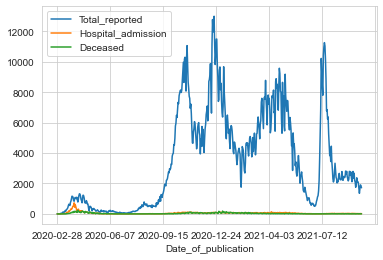

In [12]:
df.groupby(["Date_of_publication"]).sum().plot()

<AxesSubplot:xlabel='Date_of_publication'>

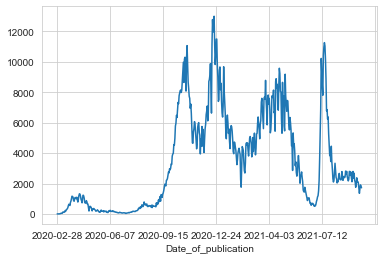

In [13]:
dftr = df.groupby(["Date_of_publication"])["Total_reported"].sum()
dftr.plot()

<AxesSubplot:xlabel='Date_of_publication'>

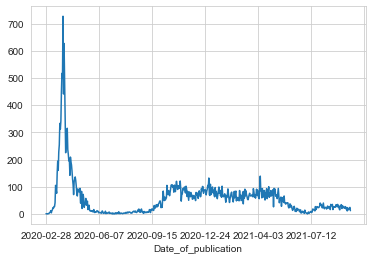

In [14]:
dfha = df.groupby(["Date_of_publication"])["Hospital_admission"].sum()
dfha.plot()

<AxesSubplot:xlabel='Date_of_publication'>

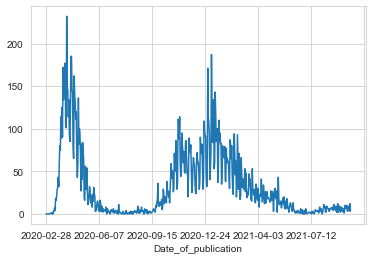

In [15]:
dfd = df.groupby(["Date_of_publication"])["Deceased"].sum()
dfd.plot()

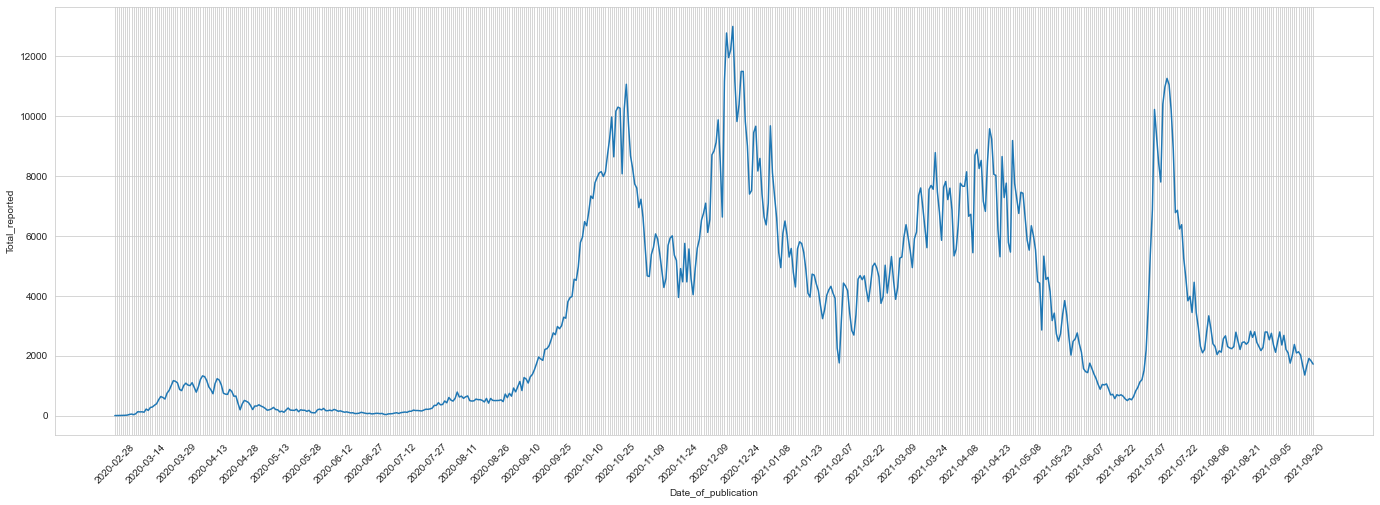

In [16]:
def lesslabels():
    for ind, label in enumerate(fig.get_xticklabels()):
        if ind % 15 == 0:  # every 15th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)


def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(60), cm2inch(20)))
fig = sns.lineplot(data=dftr)
# plt.axhline(y=1.0, color='r', linestyle='-')
lesslabels()
plt.xticks(rotation=45)
plt.show()

<Figure size 1700.79x566.929 with 0 Axes>

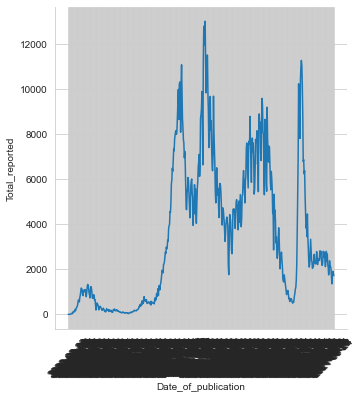

In [17]:
plt.figure(figsize=(cm2inch(60), cm2inch(20)))
fig = sns.relplot(data=dftr, kind = "line")
# plt.axhline(y=1.0, color='r', linestyle='-')
# lesslabels()
plt.xticks(rotation=45)
plt.show()